In [1]:
import pandas as pd
import numpy as np

# importing data

In [95]:
pca_data=pd.read_csv('pca_data.csv',index_col=[0])
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42
0,-1.378662,0.324723,-0.678316,-1.096767,-0.104987,0.955367,0.477642,-0.286234,-0.230561,-0.056438,...,0.480399,-0.099283,0.549424,0.709826,0.426515,0.920022,0.220622,0.118701,-0.107135,-0.247513
1,-0.841598,-0.000786,-0.707815,2.219164,-0.580844,-0.425952,0.599699,0.023524,0.820418,0.110980,...,0.749960,0.341581,-0.253211,0.095166,0.000714,-0.647273,0.108049,-0.568100,0.250677,-0.784381
2,-1.122874,0.260022,-1.032923,1.366636,-1.704659,0.615378,0.361867,0.915835,0.222459,-0.293066,...,-0.306007,0.082364,-0.187737,0.599123,0.611107,1.313692,0.048619,0.126419,-0.265820,0.459786
3,-2.455080,0.753804,-1.074699,-0.878290,0.567482,0.582563,0.252952,-0.660451,-0.894300,-0.058994,...,0.755560,0.150444,0.294900,0.049874,0.055152,-0.508791,0.170911,0.065037,-0.037749,-0.291659
4,-3.800763,1.333693,-1.049554,-1.321663,2.852828,-0.921952,-2.401585,3.465858,0.842325,0.506730,...,-0.632440,0.113311,-1.231925,-0.875267,0.130761,0.246138,-0.093915,-0.362125,-0.128031,0.263069


In [4]:
tsne_data=pd.read_csv('tsne_data.csv',index_col=[0])
tsne_data.head()

,0,1
0,-25.682354,35.797123
1,-99.848465,-30.226278
2,9.790107,60.065655
3,-3.569243,129.336010
4,3.617756,-36.706314


# 1. K-Means

In [47]:
from sklearn.cluster import KMeans

# create a k-means instance
kmeans=KMeans(n_clusters=2,init='k-means++',max_iter=194,random_state=42)
kmeans.fit(pca_data)

KMeans(max_iter=194, n_clusters=2, random_state=42)

In [48]:
pca_predict=kmeans.predict(pca_data)
centers=kmeans.cluster_centers_
print("pca predict",pca_predict)
print("centers",centers)

pca predict [1 1 1 ... 1 0 1]
centers [[ 3.01350657e+00 -4.76058608e-01  7.76809643e-02 -1.64161290e-01
   2.87591602e-01 -2.36407640e-02 -3.85245536e-02 -7.15437789e-02
  -1.05064491e-02 -8.84284633e-04 -6.32253951e-02  5.99440392e-02
   7.05675719e-02  4.46746458e-03 -1.19007743e-02 -4.27058612e-02
   1.63265752e-02 -3.29810853e-02 -1.55442563e-02  8.50649921e-02
   1.81028018e-02  2.31879918e-02  1.80739318e-02  1.93906767e-02
  -3.09380405e-02  6.12913673e-03  3.01727184e-02  6.72851219e-02
   6.19087925e-02 -2.48711734e-02 -1.05901881e-02  3.09489503e-02
  -1.47179904e-02  3.28183263e-03 -1.65592436e-02  3.63379533e-02
   1.88712797e-02 -2.62625440e-02 -1.40375759e-02 -4.76586414e-04
   5.39768021e-03  1.08638832e-02  3.18634008e-14]
 [-2.26855834e+00  3.58375434e-01 -5.84779874e-02  1.23580106e-01
  -2.16498060e-01  1.77966933e-02  2.90011637e-02  5.38579334e-02
   7.90922208e-03  6.65686711e-04  4.75958800e-02 -4.51256856e-02
  -5.31230478e-02 -3.36309339e-03  8.95886577e-03  3.

In [37]:
pca_predict.shape

(235795,)

In [38]:
pca_data['clusters']=pca_predict
pca_data['clusters']

0         1
1         1
2         1
3         1
4         1
         ..
235790    1
235791    1
235792    1
235793    0
235794    1
Name: clusters, Length: 235795, dtype: int32

In [39]:
kmeans.inertia_

9708416.654708419

In [40]:
import matplotlib.pyplot as plt


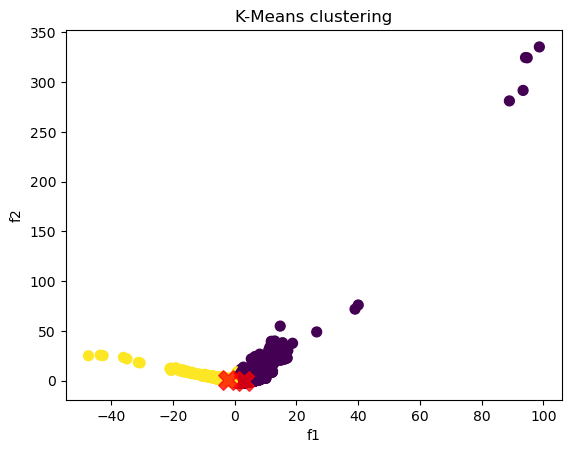

In [49]:
plt.scatter(pca_data.iloc[:,0],pca_data.iloc[:,1],c=pca_predict,s=50,cmap='viridis')
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,alpha=0.75,marker='X')
plt.title('K-Means clustering')
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()


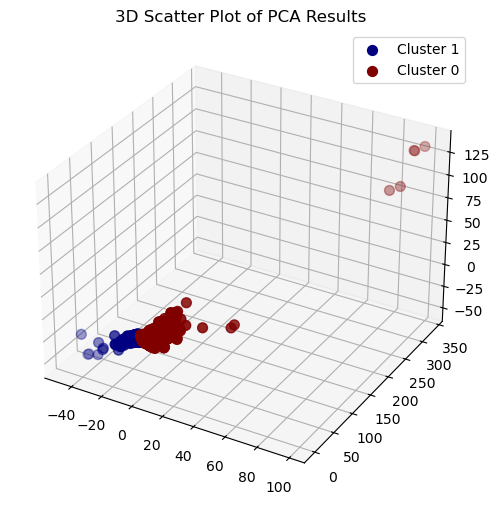

In [50]:
x = pca_data["PC1"]
y=pca_data["PC2"]
z=pca_data["PC3"]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# unique clusters 
uniq_clusters = pca_data["clusters"].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(uniq_clusters)))

# Plot each cluster
for cluster, color in zip(uniq_clusters, colors):
    ix = pca_data['clusters'] == cluster
    ax.scatter(x[ix], y[ix], z[ix], c=[color], label=f'Cluster {cluster}', s=50)

ax.set_title('3D Scatter Plot of PCA Results')
ax.legend()
plt.show()

In [91]:
acc1=accuracy_score(y,pca_predict)
acc1

0.9849233444305435

In [93]:
prec1=precision_score(y,pca_predict,pos_label=1)
prec1

0.9879947965062256

In [102]:

pca_data["y_pred_kmeans"] =pca_predict
pca_data["y_pred_kmeans"] , y

(0         1
 1         1
 2         1
 3         1
 4         1
          ..
 235790    1
 235791    1
 235792    1
 235793    0
 235794    1
 Name: y_pred_kmeans, Length: 235795, dtype: int32,
         label
 0           1
 1           1
 2           1
 3           1
 4           1
 ...       ...
 235790      1
 235791      1
 235792      1
 235793      0
 235794      1
 
 [235795 rows x 1 columns])

### Kmeans dosen't work well on this data as the datapoints are closely situated and much seperation cannot be found

### hyper parameter tuning for kmeans
1. Grid Search

In [33]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
param_grid={
    'n_clusters':[2],
    'init': ['k-means++','random'],
    'max_iter':[100,200,300]
}
kmeans1=KMeans()
gridsearch=GridSearchCV(kmeans1,param_grid,cv=5)
gridsearch.fit(pca_data)
best_params=gridsearch.best_params_
print(best_params)

##### 2. Random Search

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [46]:
param_dist={
    'n_clusters':[2],
    'init': ['k-means++','random'],
    'max_iter': randint(100,500)
}
kmeans1=KMeans()
randomsearch=RandomizedSearchCV(kmeans1,param_dist,cv=5)
randomsearch.fit(pca_data)
best_params=randomsearch.best_params_
print(best_params)

{'init': 'k-means++', 'max_iter': 194, 'n_clusters': 2}


# 2. Hierarchichal Clustering

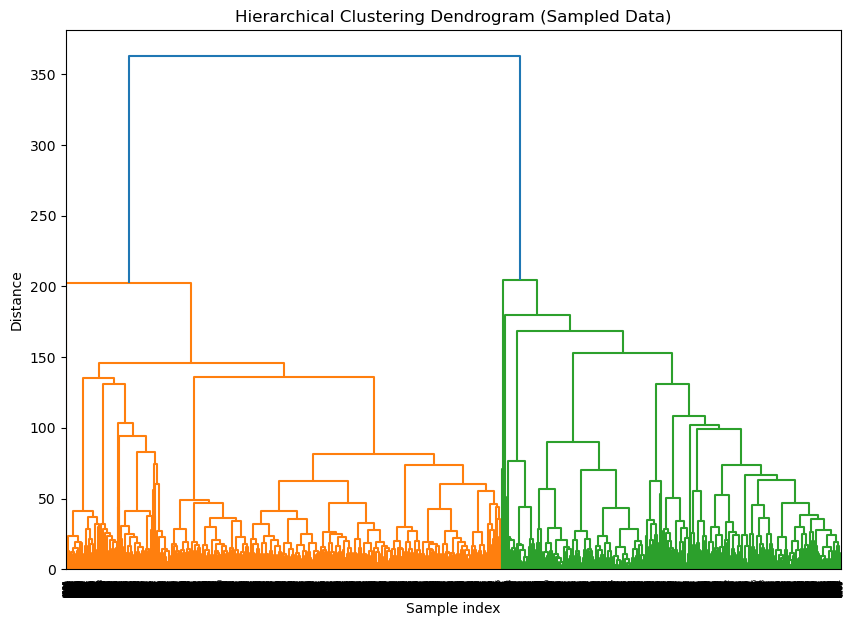

In [70]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from scipy.cluster.hierarchy import dendrogram, linkage

# Downsample your dataset (e.g., use 10,000 samples)
sample_size = 10000
pca_data_sampled = shuffle(pca_data, random_state=42)[:sample_size]

# Perform hierarchical clustering on the downsampled data
Z = linkage(pca_data_sampled, 'ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Sampled Data)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


# 4. Isolation forest

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.378662  0.324723 -0.678316 -1.096767 -0.104987  0.955367  0.477642   
1 -0.841598 -0.000786 -0.707815  2.219164 -0.580844 -0.425952  0.599699   
2 -1.122874  0.260022 -1.032923  1.366636 -1.704659  0.615378  0.361867   
3 -2.455080  0.753804 -1.074699 -0.878290  0.567482  0.582563  0.252952   
4 -3.800763  1.333693 -1.049554 -1.321663  2.852828 -0.921952 -2.401585   

        PC8       PC9      PC10  ...      PC35      PC36      PC37      PC38  \
0 -0.286234 -0.230561 -0.056438  ...  0.549424  0.709826  0.426515  0.920022   
1  0.023524  0.820418  0.110980  ... -0.253211  0.095166  0.000714 -0.647273   
2  0.915835  0.222459 -0.293066  ... -0.187737  0.599123  0.611107  1.313692   
3 -0.660451 -0.894300 -0.058994  ...  0.294900  0.049874  0.055152 -0.508791   
4  3.465858  0.842325  0.506730  ... -1.231925 -0.875267  0.130761  0.246138   

       PC39      PC40      PC41      PC42  anomaly  anomaly_label  


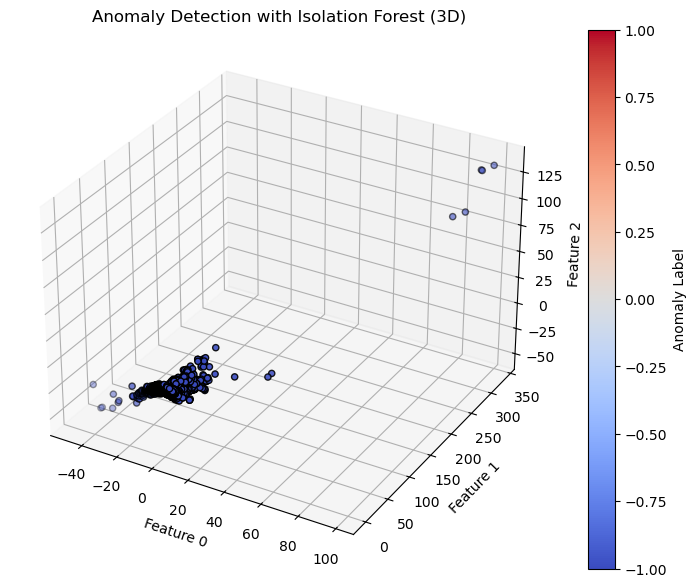

In [96]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


from mpl_toolkits.mplot3d import Axes3D





# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=100,max_samples='auto',contamination=0.1, random_state=42)  # Adjust contamination based on expected outliers
iso_forest.fit(pca_data)

# Predict anomalies
predictions = iso_forest.predict(pca_data)
# -1 indicates an anomaly (e.g., phishing URL), 1 indicates normal

# Add predictions to the DataFrame
pca_data['anomaly'] = predictions
pca_data['anomaly_label'] = pca_data['anomaly'].map({1: 'Normal', -1: 'Phishing'})

# Display results
print(pca_data.head())

# Plot results (optional)
import matplotlib.pyplot as plt
# Plot results in 3D using three specific features
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(pca_data['PC1'], pca_data['PC2'], pca_data['PC3'], c=pca_data['anomaly'], cmap='coolwarm', edgecolor='k')

# Labels and title
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 2')
ax.set_title('Anomaly Detection with Isolation Forest (3D)')

# Color bar
plt.colorbar(sc, label='Anomaly Label')

plt.show()


In [80]:
from sklearn.metrics import *

##### converting presdictions from -1 to 1 and 1 to 0

In [103]:
y_pred=[1 if x==-1 else 0 for x in predictions]
pca_data["y_pred"] = [1 if x==-1 else 0 for x in predictions]
pca_data[["y_pred","anomaly_label"]]

,y_pred,anomaly_label
0,0,Normal
1,0,Normal
2,0,Normal
3,1,Phishing
4,1,Phishing
...,...,...
235790,0,Normal
235791,0,Normal
235792,0,Normal
235793,0,Normal


In [98]:
prec=precision_score(y,y_pred,pos_label=1)
prec

0.5189143341815098

In [99]:
acc=accuracy_score(y,y_pred)
acc

0.4318878686995059

In [104]:
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC37,PC38,PC39,PC40,PC41,PC42,anomaly,anomaly_label,y_pred,y_pred_kmeans
0,-1.378662,0.324723,-0.678316,-1.096767,-0.104987,0.955367,0.477642,-0.286234,-0.230561,-0.056438,...,0.426515,0.920022,0.220622,0.118701,-0.107135,-0.247513,1,Normal,0,1
1,-0.841598,-0.000786,-0.707815,2.219164,-0.580844,-0.425952,0.599699,0.023524,0.820418,0.110980,...,0.000714,-0.647273,0.108049,-0.568100,0.250677,-0.784381,1,Normal,0,1
2,-1.122874,0.260022,-1.032923,1.366636,-1.704659,0.615378,0.361867,0.915835,0.222459,-0.293066,...,0.611107,1.313692,0.048619,0.126419,-0.265820,0.459786,1,Normal,0,1
3,-2.455080,0.753804,-1.074699,-0.878290,0.567482,0.582563,0.252952,-0.660451,-0.894300,-0.058994,...,0.055152,-0.508791,0.170911,0.065037,-0.037749,-0.291659,-1,Phishing,1,1
4,-3.800763,1.333693,-1.049554,-1.321663,2.852828,-0.921952,-2.401585,3.465858,0.842325,0.506730,...,0.130761,0.246138,-0.093915,-0.362125,-0.128031,0.263069,-1,Phishing,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,-3.782410,1.020506,-0.077056,-0.782099,-0.727545,0.361507,0.455551,-0.309839,0.886216,0.510433,...,0.359416,-0.295259,0.222165,-0.086017,-0.131831,0.029187,1,Normal,0,1
235791,-0.964874,0.516785,-2.221999,1.675765,-1.011234,0.448770,0.078040,0.551362,-0.935288,-0.433384,...,-1.261044,-0.241099,0.491604,-0.053508,-0.094520,-0.047255,1,Normal,0,1
235792,-2.758728,0.386707,0.193512,0.892685,-1.666808,0.173100,0.432919,0.618102,0.911869,-0.183599,...,-0.021629,-0.009247,-0.446815,-0.103278,-0.020310,0.271679,1,Normal,0,1
235793,2.884210,0.812572,-3.238192,-1.734662,-0.875155,1.559405,-0.876397,0.387576,-0.476262,0.619637,...,-0.418853,0.484254,0.144505,-0.100548,-0.107840,0.180638,1,Normal,0,0
